In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
#import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import colormaps as cmaps
from readCMIP5 import *

%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


In [2]:
snow_depth = readCMIP5Data("../data/SnowDepth_snd/", "gridded", "rcp45", "1", "snd")[2]

In [3]:
month_idx = pd.date_range('2005-01-01', periods=95*12, freq='1M')

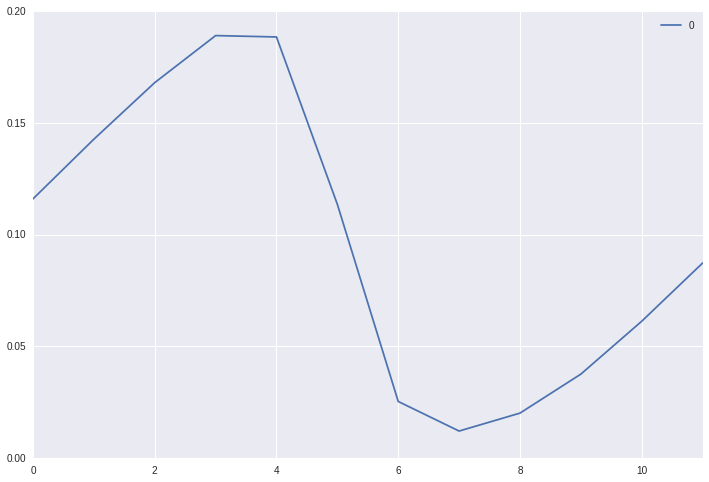

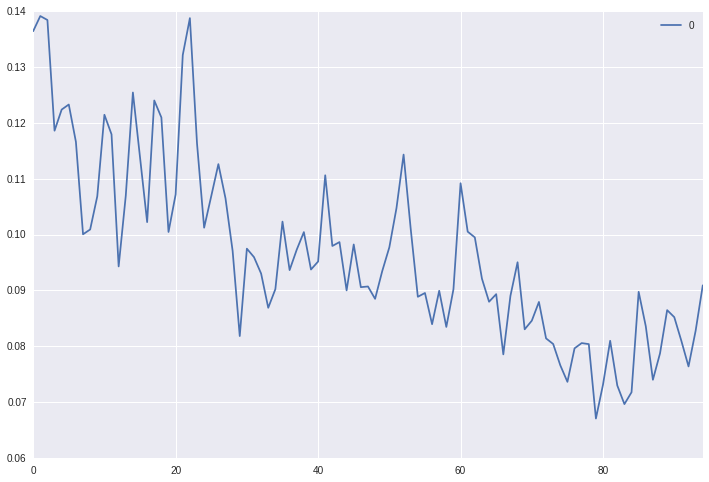

In [4]:
snow_means = np.asarray(snow_depth.mean(axis=3).mean(axis=2))
pd.DataFrame(snow_means.mean(axis=0)).plot() # take a look at monthly averages
pd.DataFrame(snow_means.mean(axis=1)).plot() # ... and yearly averages

In [5]:
snow_means = pd.DataFrame(snow_means.reshape([95*12]), columns=["snd"])

In [6]:
snow_means = snow_means.set_index(month_idx)
snow_means.head()

,snd
2005-01-31,0.169378
2005-02-28,0.194622
2005-03-31,0.218801
2005-04-30,0.237389
2005-05-31,0.242039


In [7]:
month_idx

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31',
               ...
               '2099-03-31', '2099-04-30', '2099-05-31', '2099-06-30',
               '2099-07-31', '2099-08-31', '2099-09-30', '2099-10-31',
               '2099-11-30', '2099-12-31'],
              dtype='datetime64[ns]', length=1140, freq='M')

In [8]:
snow_means.describe()

,snd
count,1140.000000
mean,0.096773
std,0.066131
min,0.000369
25%,0.033226
50%,0.094818
75%,0.154363
max,0.257954


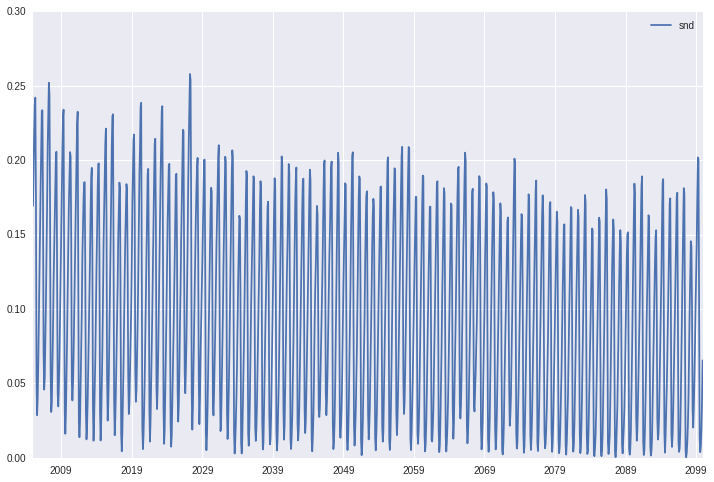

In [9]:
snow_means.plot()

In [10]:
snow_means["2005"]

,snd
2005-01-31,0.169378
2005-02-28,0.194622
2005-03-31,0.218801
2005-04-30,0.237389
2005-05-31,0.242039
2005-06-30,0.175057
2005-07-31,0.051464
2005-08-31,0.028652
2005-09-30,0.040362
2005-10-31,0.064317


In [11]:
snow_means["2005-01"]

,snd
2005-01-31,0.169378


In [12]:
snow_means["2005-01":"2006"]

,snd
2005-01-31,0.169378
2005-02-28,0.194622
2005-03-31,0.218801
2005-04-30,0.237389
2005-05-31,0.242039
2005-06-30,0.175057
2005-07-31,0.051464
2005-08-31,0.028652
2005-09-30,0.040362
2005-10-31,0.064317


In [13]:
snow_means[ snow_means["snd"] > 0.26]

,snd


In [14]:
[snow_means.mean(),
 snow_means.var(),
 snow_means.max()]

[snd    0.096773
 dtype: float64, snd    0.004373
 dtype: float64, snd    0.257954
 dtype: float64]

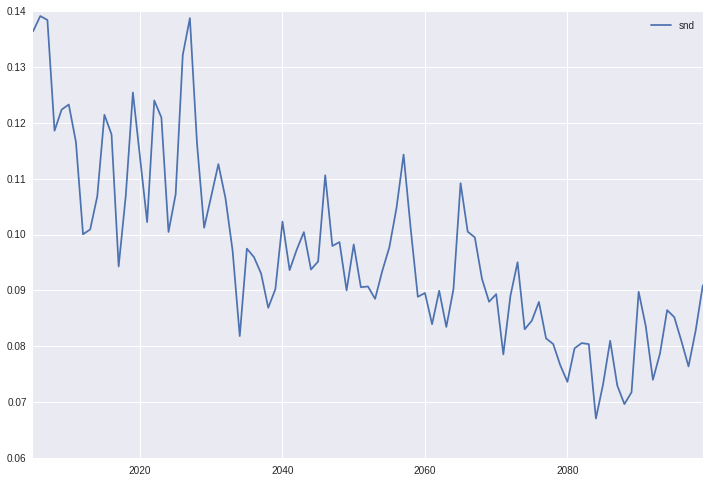

In [15]:
snow_means.groupby(snow_means.index.year).mean().plot()

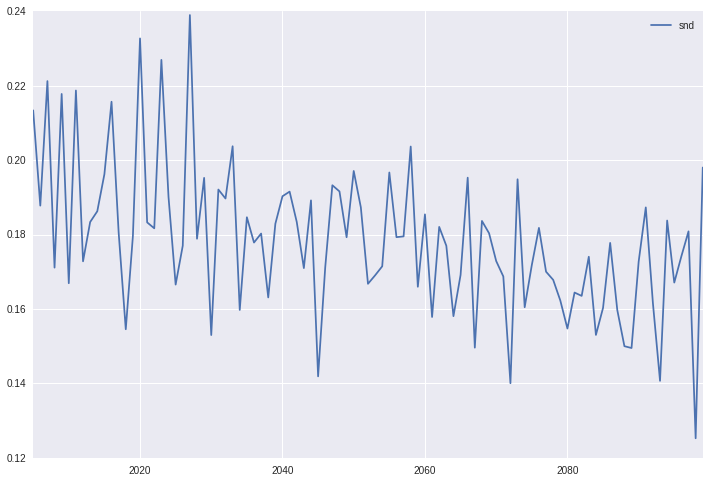

In [16]:
snow_means.groupby(snow_means.index.year).apply(lambda x: np.max(x)-np.min(x)).plot() # plot range each year

## Trend and seasonality

In [17]:
res = sm.tsa.seasonal_decompose(snow_means)

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


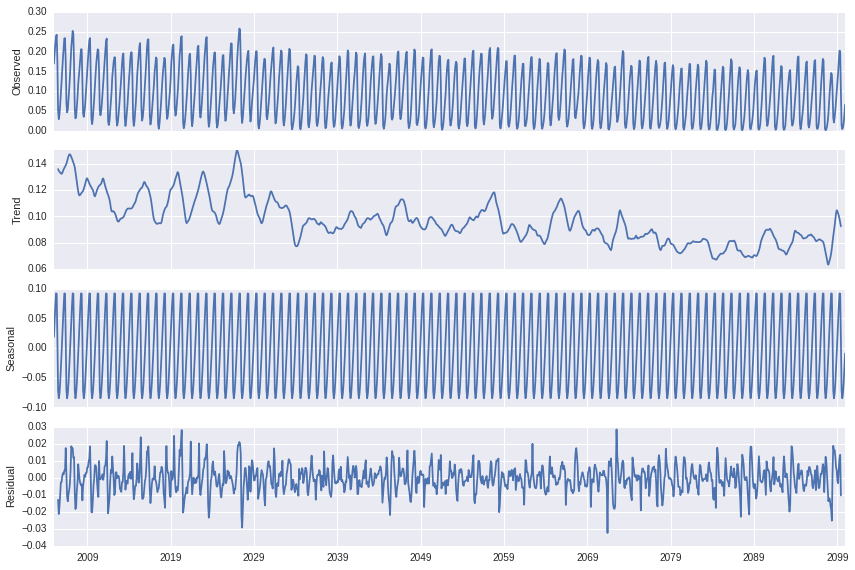

In [18]:
resplot = res.plot()

In [19]:
res.trend.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,snd
count,1128.000000
mean,0.096596
std,0.016905
min,0.063243
25%,NaN
50%,NaN
75%,NaN
max,0.149957


## Rolling statistics

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


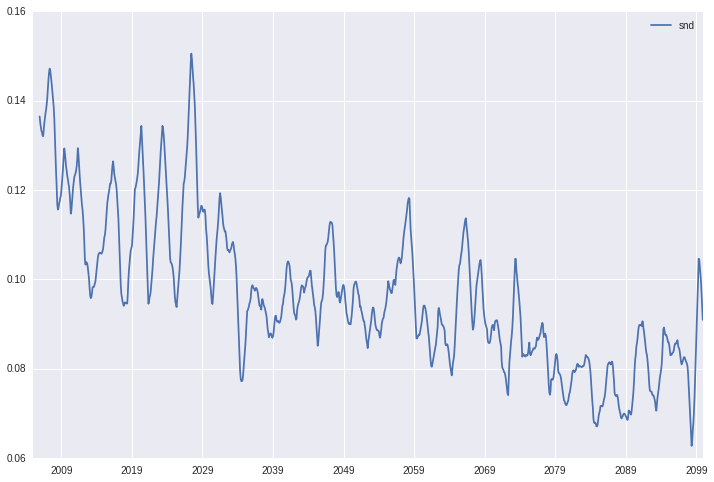

In [20]:
pd.rolling_mean(snow_means, window=12).plot()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=36,center=False).mean()
  if __name__ == '__main__':


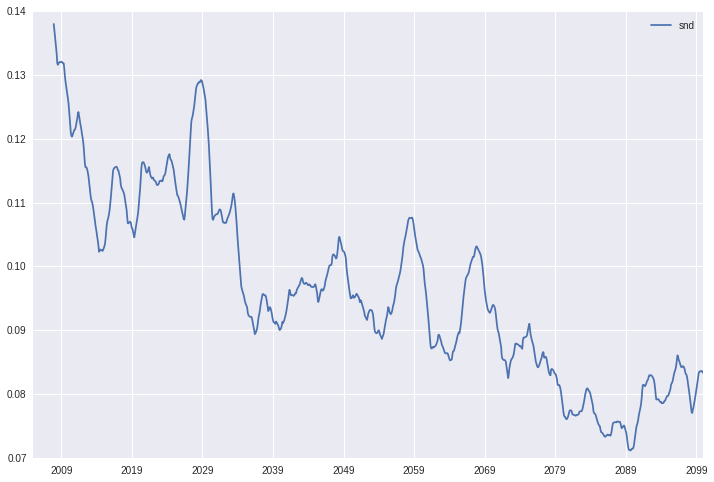

In [21]:
pd.rolling_mean(snow_means, window=36).plot()

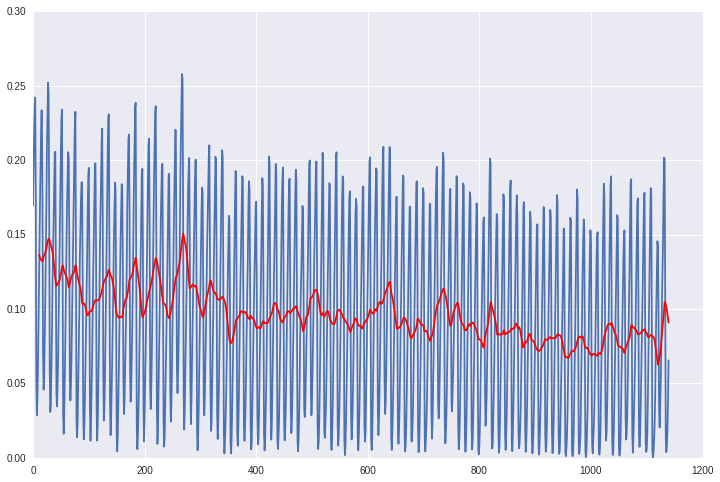

In [22]:
## plot both to more easily compare
moving_avg = snow_means.rolling(window=12,center=False).mean()
plt.plot(snow_means)
plt.plot(moving_avg, color="red")